In [1]:
!python --version

Python 3.8.12


In [2]:
%%capture
!pip install keybert
!pip install --upgrade wikipedia

In [3]:
from keybert import KeyBERT
import wikipedia
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

%matplotlib inline

In [4]:
# Parameters

debug = False
page_title = "Computer security"
max_doc_lengh = 100000

# Word Cloud parameters
wc_max_words = 100
wc_min_word_length = 6
wc_collocation_threshold = 30  # default value. Bigrams must have a Dunning likelihood collocation score greater than this parameter to be counted as bigrams.
wc_mode = "RGB" # color mode. Ohter option: alpha channel --> "RGBA"
wc_background_color = 'white'

wc_additional_stopwords = {''}
wc_all_stopwords = wc_additional_stopwords.union(STOPWORDS)

In [7]:
if 'page_title' in locals():
    page = wikipedia.WikipediaPage(page_title)
    doc = page.content[:max_doc_lengh] 
    if debug:
        print(doc)
else:        
    doc = """
             Supervised learning is the machine learning task of learning a function that
             maps an input to an output based on example input-output pairs.[1] It infers a
             function from labeled training data consisting of a set of training examples.[2]
             In supervised learning, each example is a pair consisting of an input object
             (typically a vector) and a desired output value (also called the supervisory signal). 
             A supervised learning algorithm analyzes the training data and produces an inferred function, 
             which can be used for mapping new examples. An optimal scenario will allow for the 
             algorithm to correctly determine the class labels for unseen instances. This requires 
             the learning algorithm to generalize from the training data to unseen situations in a 
             'reasonable' way (see inductive bias).
          """

In [8]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc,
                                     top_n=wc_max_words,
                                     diversity=0.2 ,
                                     stop_words='english')

print(*keywords, sep='\n')

('cybersecurity', 0.6566)
('cybercrime', 0.5349)
('security', 0.5296)
('cyberattacks', 0.5189)
('cybercrimes', 0.5115)
('cyberattack', 0.497)
('cyberterrorism', 0.4946)
('cyber', 0.4914)
('cyberwarfare', 0.4696)
('cybercriminal', 0.4491)
('hacker', 0.4376)
('hackers', 0.4365)
('cybercriminals', 0.4287)
('cyberwar', 0.4248)
('antivirus', 0.4177)
('hacking', 0.4099)
('viruses', 0.4091)
('computers', 0.4075)
('technology', 0.4048)
('firewalls', 0.4048)
('virus', 0.4047)
('cyberspace', 0.3856)
('technological', 0.3846)
('securing', 0.3837)
('internet', 0.3786)
('technologies', 0.378)
('secure', 0.3779)
('iot', 0.3768)
('vulnerabilities', 0.3764)
('nsas', 0.3745)
('surveillance', 0.3731)
('firewall', 0.3667)
('nsa', 0.3598)
('computer', 0.3562)
('malware', 0.3559)
('electronics', 0.3549)
('electronic', 0.3513)
('espionage', 0.3505)
('securely', 0.3494)
('cryptosystem', 0.3484)
('phishing', 0.3471)
('protecting', 0.3457)
('encryption', 0.3452)
('protection', 0.3382)
('botnet', 0.3372)
('mcaf

In [9]:
keywords = kw_model.extract_keywords(doc,
                                     highlight=True,
                                     top_n=wc_max_words,
                                     diversity=0.2,
                                     stop_words='english')

Computer security, cybersecurity, or information technology security (IT security) is the 
protection of computer systems and networks from information disclosure, theft of or damage 
to their hardware, software, or electronic data, as well as from the disruption or 
misdirection of the services they provide.The field is becoming increasingly significant due 
to the continuously expanding reliance on computer systems, the Internet and wireless network
standards such as Bluetooth and Wi-Fi, and due to the growth of "smart" devices, including 
smartphones, televisions, and the various devices that constitute the "Internet of things". 
Cybersecurity is also one of the significant challenges in the contemporary world, due to its
complexity, both in terms of political usage and technology. == History == Since the 
Internet's arrival and with the digital transformation initiated in recent years, the notion 
of cybersecurity has become a familiar subject both in our professional and personal lives. 
Cybersecurity and cyber threats have been constant for the last 50 years of technological 
change. In the 1970s and 1980s, computer security was mainly limited to academia until the 
conception of the Internet, where, with increased connectivity, computer viruses and network 
intrusions began to take off. After the spread of viruses in the 1990s, the 2000s marked the 
institutionalization of cyber threats and cybersecurity. Finally, from the 2010s, large-scale
attacks and government regulations started emerging. The April 1967 session organized by 
Willis Ware at the Spring Joint Computer Conference, and the later publication of the Ware 
Report, were foundational moments in the history of the field of computer security. Ware's 
work straddled the intersection of material, cultural, political, and social concerns.A 1977 
NIST publication introduced the "CIA triad" of Confidentiality, Integrity, and Availability 
as a clear and simple way to describe key security goals. While still relevant, many more 
elaborate frameworks have since been proposed.However, the 1970s and 1980s didn't have any 
grave computer threats because computers and the internet were still developing, and security
threats were easily identifiable. Most often, threats came from malicious insiders who gained
unauthorized access to sensitive documents and files. Although malware and network breaches 
existed during the early years, they did not use them for financial gain. However, by the 
second half of the 1970s, established computer firms like IBM started offering commercial 
access control systems and computer security software products.It started with Creeper in 
1971. Creeper was an experimental computer program written by Bob Thomas at BBN. It is 
considered the first computer worm. In 1972, the first anti-virus software was created, 
called Reaper. It was created by Ray Tomlinson to move across the ARPANET and delete the 
Creeper worm. Between September 1986 and June 1987, a group of German hackers performed the 
first documented case of cyber espionage. The group hacked into American defense contractors,
universities, and military bases' networks and sold gathered information to the Soviet KGB. 
The group was led by Markus Hess, who was arrested on 29 June 1987. He was convicted of 
espionage (along with two co-conspirators) on 15 Feb 1990. In 1988, one of the first computer
worms, called Morris worm was distributed via the Internet. It gained significant mainstream 
media attention. In 1993, Netscape started developing the protocol SSL, shortly after the 
National Center for Supercomputing Applications (NCSA) launched Mosaic 1.0, the first web 
browser, in 1993. Netscape had SSL version 1.0 ready in 1994, but it was never released to 
the public due to many serious security vulnerabilities. These weaknesses included replay 
attacks and a vulnerability that allowed hackers to alter unencrypted communications sent by 
users. However, in February 1995, Netscape lau

In [10]:
wc = WordCloud(width=1000, height=1000, min_word_length=wc_min_word_length, max_words=wc_max_words, collocation_threshold=wc_collocation_threshold, mode=wc_mode, background_color=wc_background_color, stopwords=wc_all_stopwords)
wc_img_doc = wc.generate(doc)


In [11]:
keywords_dict = {keywords[i][0]: keywords[i][1] for i in range(0, len(keywords))}

wc2 = WordCloud(width=1000, height=1000, min_word_length=wc_min_word_length, max_words=wc_max_words, collocation_threshold=wc_collocation_threshold, mode=wc_mode, background_color=wc_background_color)
wc_img_keybert = wc2.generate_from_frequencies(keywords_dict)

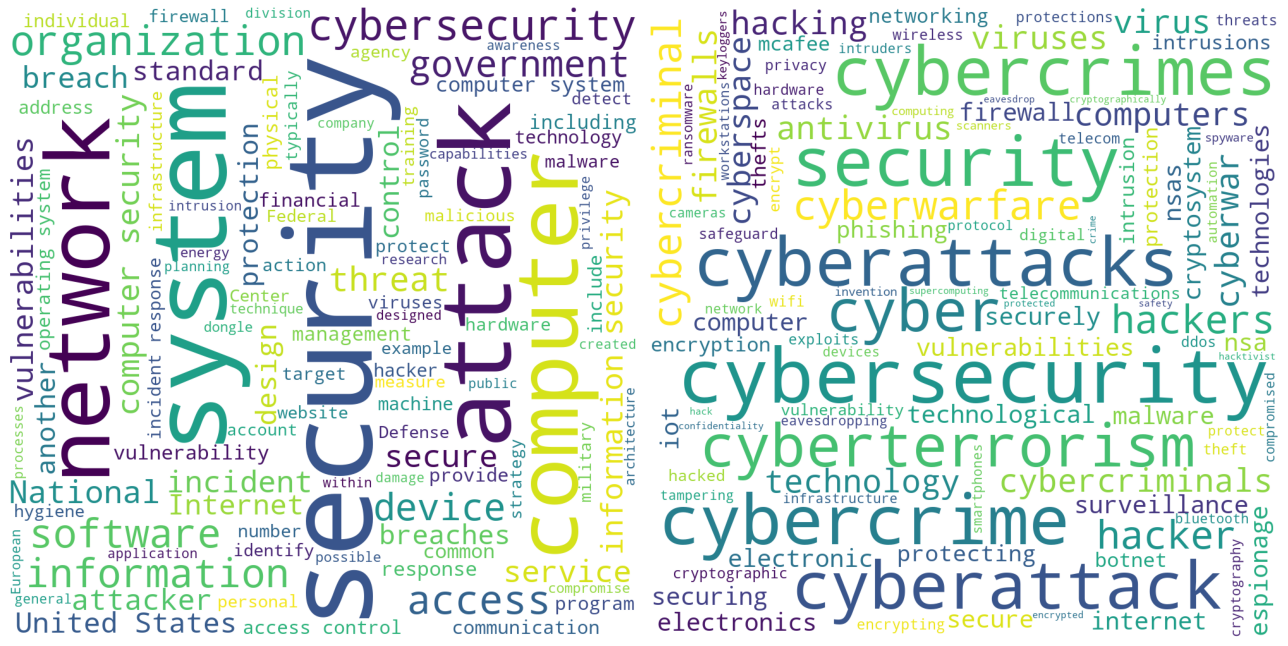

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,18))
# fig.suptitle('Comparison between normal word frequency and topic model')

ax1.imshow(wc_img_doc)
ax2.imshow(wc_img_keybert)
ax1.axis("off")
ax2.axis("off")
fig.tight_layout()
plt.show();